(4506, 6)
(4506, 6)


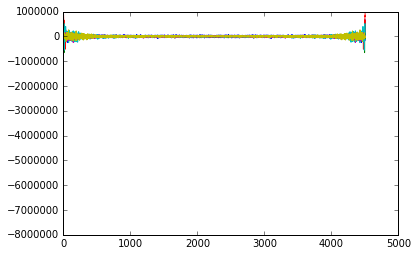

In [1]:
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

FILE = 'pills-s0.npy'
x = np.load(FILE)
print(x.shape)

xf = np.fft.fft(x, axis=0)
print(xf.real.shape)

plt.plot(xf.real)
plt.show()

In [4]:
%matplotlib tk

import numpy as np
import matplotlib.pyplot as plt

FILE = 'pills-s0.npy'
x = np.load(FILE)

xf = np.fft.fft(x[2250:2300, :], axis=0)
print(xf.real.shape)

plt.plot(xf.real)
plt.show()

(50, 6)
